In [1]:
import geopandas as gpd
import folium
import osmnx as ox
import matplotlib.pyplot as plt

In [2]:
# read the data
gdf = gpd.read_file('../dataset/TOPS_365days_20240103.geojson')
# convert the coordinate to 4326 (longitute, latitude)
gdf.crs = f'epsg:102100'
gdf = gdf.to_crs(epsg=4326)

/tmp/ipykernel_32615/1133831893.py:6: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead.
  G = ox.graph_from_bbox(north, south, east, west, network_type='drive')


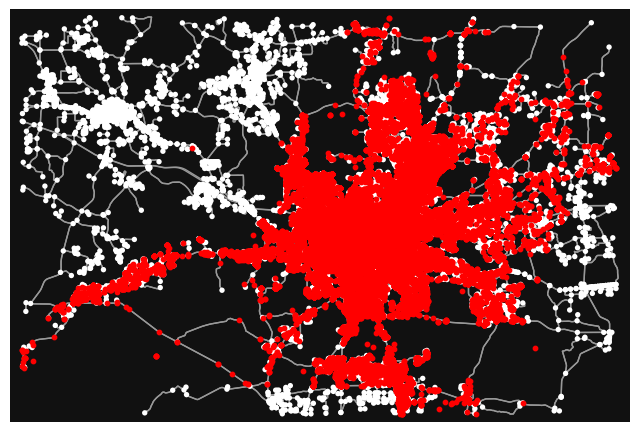

In [3]:
# Get the bounding box of your GeoDataFrame
bbox = gdf.total_bounds  # returns (minx, miny, maxx, maxy)
north, south, east, west = bbox[3], bbox[1], bbox[2], bbox[0]

# Get the street network for the area of interest. Adjust 'network_type' as needed
G = ox.graph_from_bbox(north, south, east, west, network_type='drive')

# Plot the street network
fig, ax = ox.plot_graph(G, show=False, close=False)

# Plot your crime data on top of the street network
gdf.plot(ax=ax, color='red', markersize=10)  # Adjust color and markersize as needed

# Show the plot
plt.show()

In [ ]:
# Configure OSMnx
ox.config(use_cache=True, log_console=True)

# Define the center of Tallahassee (latitude, longitude) and distance (in meters)
center_point = (30.4383, -84.2807)  # Example coordinates for Tallahassee
distance = 10000  # Example distance from the center in meters to cover Tallahassee

# Create a graph from the bounding box, which is square
graph = ox.graph_from_point(center_point, dist=distance, dist_type='bbox', network_type='drive')

# Project the graph
graph_proj = ox.project_graph(graph)

# Plot the graph with a specified figure size to ensure the output is square
fig, ax = ox.plot_graph(graph_proj, figsize=(100, 100), node_size=0, edge_linewidth=1, show=False, close=False)
fig.tight_layout(pad=0)

plt.savefig('tallahassee_square_map.png', dpi=10)

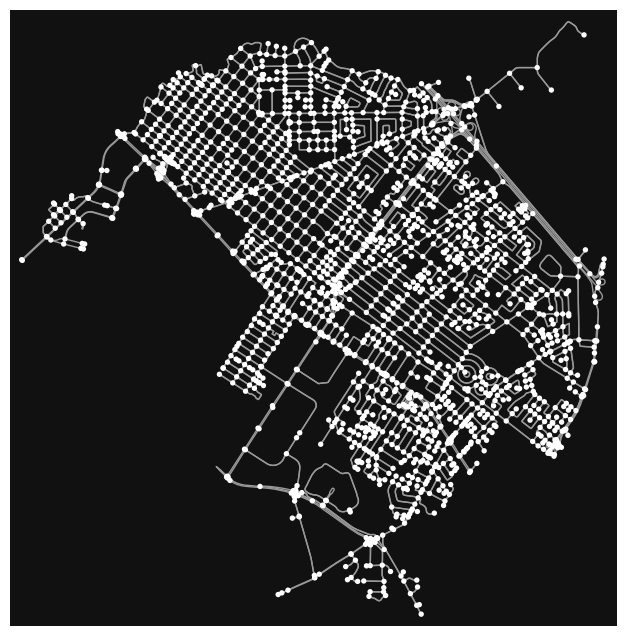

In [8]:
import osmnx as ox

# Specify the location
place_name = "Palo Alto, California, USA"

# Configure the place and network type you are interested in
graph = ox.graph_from_place(place_name, network_type='drive')

# Plot the streets
fig, ax = ox.plot_graph(ox.project_graph(graph))

/tmp/ipykernel_29612/1744101919.py:7: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  buildings = ox.geometries_from_place(place_name, tags={'building': True})


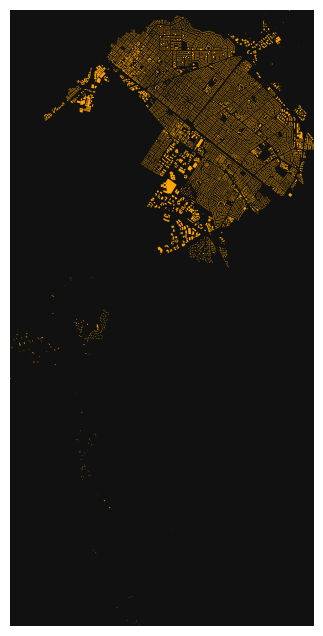

In [10]:
import osmnx as ox

# Specify the location
place_name = "Palo Alto, California, USA"

# Download building footprints
buildings = ox.geometries_from_place(place_name, tags={'building': True})

# Plot the buildings
fig, ax = ox.plot_footprints(buildings)

/tmp/ipykernel_29612/2129676869.py:2: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)
/tmp/ipykernel_29612/2129676869.py:11: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  buildings = ox.geometries_from_place(place_name, tags={'building': True})
/tmp/ipykernel_29612/2129676869.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  

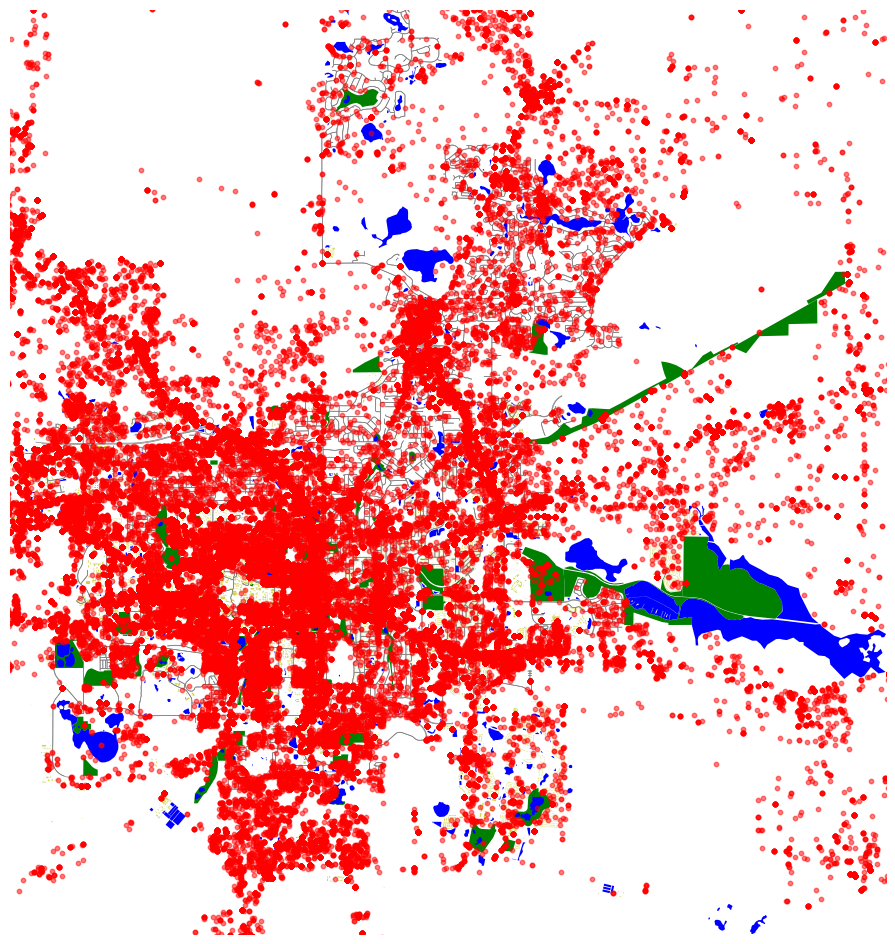

In [21]:
# Configure OSMnx to use footprints (to include buildings)
ox.config(use_cache=True, log_console=True)

# Specify the location
place_name = "Tallahassee, Florida, USA"

# Download street network
streets = ox.graph_from_place(place_name, network_type='drive')

# Download building footprints
buildings = ox.geometries_from_place(place_name, tags={'building': True})

# Download parks
parks = ox.geometries_from_place(place_name, tags={'leisure': 'park'})

# Download water bodies
water_bodies = ox.geometries_from_place(place_name, tags={'natural': 'water'})

# Initialize figure and axis
fig, ax = plt.subplots(figsize=(12, 12))

# Plot streets
ox.plot_graph(streets, ax=ax, bgcolor='black', edge_color='gray', node_size=0, edge_linewidth=0.5, show=False)
# Plot buildings
ox.plot_footprints(buildings, ax=ax, color='y', alpha=0.7, show=False)
# Plot Parks
ox.plot_footprints(parks, color='green', ax=ax, show=False, figsize=(10, 10))
# Plot Water Bodies
ox.plot_footprints(water_bodies, color='blue', ax=ax, show=False)

# crime data
x = gdf.geometry.x
y = gdf.geometry.y

# Simple heatmap using scatter plot
hb = ax.scatter(x, y, alpha=0.5, c='red', s=10)  # Adjust alpha, color, and size as needed

# Show the plot
plt.show()

# Plotting Base Map

In [ ]:
# Configure OSMnx
ox.config(use_cache=True, log_console=True)

# Define the center of Tallahassee (latitude, longitude) and distance (in meters)
center_point = (30.479203013085982, -84.3386654250425) 
dist = 20000

# Download street network around the specified center point
streets = ox.graph_from_point(center_point, dist=dist, network_type='drive')

# Download building footprints
buildings = ox.geometries_from_point(center_point, tags={'building': True}, dist=dist)

# Download parks
parks = ox.geometries_from_point(center_point, tags={'leisure': 'park'}, dist=dist)

# Download water bodies
water_bodies = ox.geometries_from_point(center_point, tags={'natural': 'water'}, dist=dist)

# Initialize figure and axis
fig, ax = plt.subplots(figsize=(256, 256))

# Plot streets
ox.plot_graph(streets, ax=ax, bgcolor='black', edge_color='gray', node_size=0, edge_linewidth=0.5, show=False)

# Plot buildings, parks, and water bodies
# Note: As of my last update, `ox.plot_footprints` might not directly support GeoDataFrames from `ox.geometries_from_point`.
# If `ox.plot_footprints` is not available or compatible, use the standard GeoPandas plot method as follows:
buildings.plot(ax=ax, color='yellow', alpha=0.7)  #ls Adjust colors and alpha as needed
parks.plot(ax=ax, color='green', alpha=0.7)  # Adjust colors and alpha as needed
water_bodies.plot(ax=ax, color='blue', alpha=0.7)  # Adjust colors and alpha as needed

# Assuming `gdf` is a GeoDataFrame containing your crime data with a 'geometry' column
# Ensure you have this data prepared and loaded as a GeoDataFrame
# Plot crime data (you need to define or load `gdf` before this part)
#x = gdf.geometry.x
#y = gdf.geometry.y
#hb = ax.scatter(x, y, alpha=0.2, c='black', s=10)  # Adjust alpha, color, and size as needed
fig.tight_layout(pad=0)
plt.savefig('tallahassee_square_map.png', dpi=64)

# Plotting Heatmap

In [ ]:
fig, ax = plt.subplots(figsize=(256, 256))
# Plot invisible road map for alignment
ox.plot_graph(streets, ax=ax, bgcolor='white', edge_color='white', node_size=0, edge_linewidth=0.5, show=False)

# Assuming `gdf` is a GeoDataFrame containing your crime data with a 'geometry' column
# Ensure you have this data prepared and loaded as a GeoDataFrame
# Plot crime data (you need to define or load `gdf` before this part)
x = gdf.geometry.x
y = gdf.geometry.y
hb = ax.scatter(x, y, alpha=0.2, c='black', s=10)  # Adjust alpha, color, and size as needed
fig.tight_layout(pad=0)
plt.savefig('tallahassee_square_map.png', dpi=64)